# Text Classification with FastText & Preprocessed with NLTK Library

- **Official Documentations :**
- what is fasttext : https://fasttext.cc/docs/en/support.html
- Tutorials(Text Classification): https://fasttext.cc/docs/en/supervised-tutorial.html
- Tutorials(Word Representation): https://fasttext.cc/docs/en/unsupervised-tutorial.html
- python module : https://fasttext.cc/docs/en/python-module.html
- Blog post: https://fasttext.cc/blog/2016/08/18/blog-post.html
- why fasttext invented : https://arxiv.org/pdf/1607.04606.pdf
- github : https://github.com/facebookresearch/fastText
- **Articles :**
- https://medium.com/@oleg.tarasov/building-fasttext-python-wrapper-from-source-under-windows-68e693a68cbb
- https://radimrehurek.com/gensim/models/fasttext.html
- https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/

#### What is fasttext?

**fastText** is an open-source library, developed by the Facebook AI Research lab. 
- **Why fasttext?**
- better and faster **text classification**
- **efficient learning** of **word representations** 
- for processing large datasets quickly and accurately.
- fastText stacks impressively in both accuracy and training and testing times against previously published state-of-the-art models.

##### Dataset : 
https://www.kaggle.com/snap/amazon-fine-food-reviews

##### Workflow : 
- Import required libraries
- Basic Data Exploration
- Feature Engineering
- Model creation and Evaluation

##### ___________________________ Importing necessary Libraries_____

In [1]:
import re
import missingno
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\FastText\Dataset\Amazon_FoodReviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##### ___________________________ Basic Data Exploration & Preprocessing _______________________________________

In [4]:
print(df.columns.tolist())

['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
#dropping unnecessary columns
df= df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time', 'Summary'], axis=1)

In [7]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [8]:
#checking null values

df.isnull().sum()

Score    0
Text     0
dtype: int64

In [9]:
#checking nan values

df.isna().sum()

Score    0
Text     0
dtype: int64

In [10]:
print(df['Score'].unique())  #checking scores

[5 1 4 2 3]


In [11]:
a = df['Score'].value_counts()
a

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='Count'>

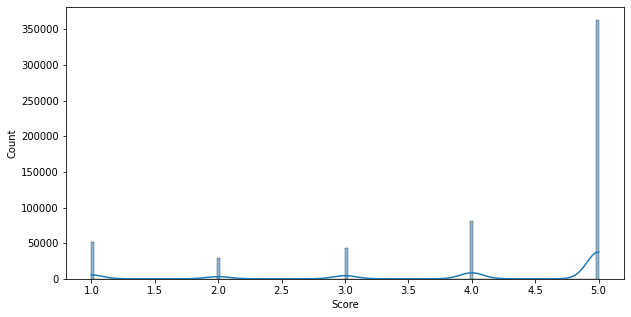

In [12]:
plt.figure(figsize = (10, 5))
sns.histplot(x ="Score",data=df, kde = True,palette="dark")

In [13]:
for i, row in df.iterrows():
    if df['Score'][i] == 5:
        df['Score'][i] = 'Highly Positive'
    elif df['Score'][i] ==4:
        df['Score'][i] = 'Positive' 
    elif df['Score'][i] == 3:
         df['Score'][i] = 'Moderate' 
    elif df['Score'][i] >= 1 or df['Score'][i] <=2:
        df['Score'][i] = 'Negative' 
    elif df['Score'][i] == 0:
        df['Score'][i] = 'Neutral' 

<ipython-input-13-7a11bfd5a22e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'][i] = 'Highly Positive'
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df.head()

b = df['Score'].value_counts()
b

Highly Positive    363122
Negative            82037
Positive            80655
Moderate            42640
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

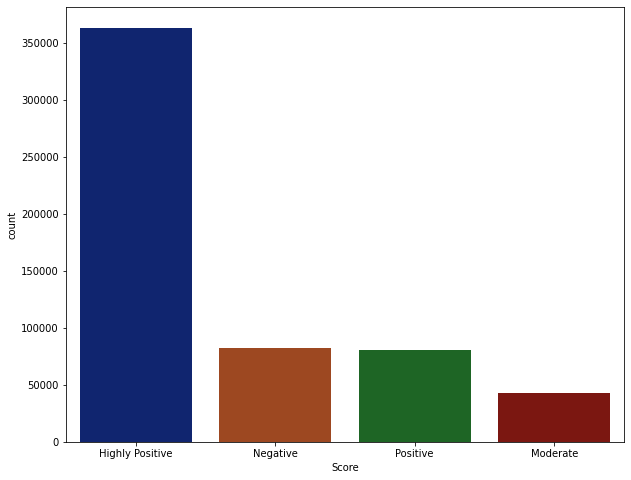

In [15]:
plt.figure(figsize = (10,8))
sns.countplot(x="Score",data=df, palette="dark")

In [17]:
ps = PorterStemmer()
def clean_text(Text):
    Text = str(Text).lower() # convert to lowercase
    Text = re.sub('\[.*?\]', '', Text) 
    Text = re.sub(r"\s+[a-zA-Z]\s+", ' ', Text) # remove single letter
    Text = Text.replace('n\'t', ' not') # convert n't to not
    Text = re.sub('https?://\S+|www\.\S+', '', Text) # Remove URls, whitespace characters
    Text= re.sub('<.*?>+', '',Text)
    Text = re.sub(r'[^a-z0-9\s]', '', Text) # Remove punctuation
    Text= re.sub('\n', '', Text)
    Text= re.sub('\w*\d\w*', '', Text) #\d matches a digit between 0 to 9
    Text = Text.split() #tokenization
    Text = [ps.stem(word) for word in Text if not word in stopwords.words('english')] #stemming and removing stopwords
    Text = ' '.join(Text)
    return Text

In [18]:
df['Text'] = df['Text'].apply(clean_text)

In [19]:
df

,Score,Text
0,Highly Positive,bought sever vital can dog food product found ...
1,Negative,product arriv label jumbo salt peanutsth peanu...
2,Positive,confect around centuri light pillowi citru gel...
3,Negative,look secret ingredi robitussin believ found go...
4,Highly Positive,great taffi great price wide assort yummi taff...
...,...,...
568449,Highly Positive,great sesam chickenthi good better restur eate...
568450,Negative,im disappoint flavor chocol note especi weak m...
568451,Highly Positive,star small give one train session tri train do...
568452,Highly Positive,best treat train reward dog good groom lower c...


#### Data splitting

In [20]:
train_df= df[:420000]  #taking the first 420000 data from the huge dataset
print(train_df['Text'].iloc[0])
train_df

bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better


,Score,Text
0,Highly Positive,bought sever vital can dog food product found ...
1,Negative,product arriv label jumbo salt peanutsth peanu...
2,Positive,confect around centuri light pillowi citru gel...
3,Negative,look secret ingredi robitussin believ found go...
4,Highly Positive,great taffi great price wide assort yummi taff...
...,...,...
419995,Highly Positive,im familiar brand alreadi like one realli enjo...
419996,Highly Positive,starbuck coffe opinon second none best coffe ever
419997,Highly Positive,maxwel hous lite coffe quit similar folger hal...
419998,Positive,ca go wrong wolfgang puck qualiti alway great ...


In [21]:
test_df= df[420000:]  #taking the first 20000 data from the huge dataset
print(test_df['Text'].iloc[0])
test_df

im coffe drinker thought id give tri sinc like caramel latt occas ive ad plu littl sugar good tast good balanc coffeecreamersugar make sicki sweet like barrista version bitter like coffe


,Score,Text
420000,Positive,im coffe drinker thought id give tri sinc like...
420001,Positive,never tast thisbut wife stepdaught love cheapb...
420002,Highly Positive,lot choic net buy hazelnut went klein simpli p...
420003,Highly Positive,love garlic marinara sauc tast like homemad ad...
420004,Highly Positive,hope said lol sauc amaz size perfect great man...
...,...,...
568449,Highly Positive,great sesam chickenthi good better restur eate...
568450,Negative,im disappoint flavor chocol note especi weak m...
568451,Highly Positive,star small give one train session tri train do...
568452,Highly Positive,best treat train reward dog good groom lower c...


In [22]:
# fastText expects the category first, with the prefix ‘__label__’ before each category, and then the input text

In [23]:
train_dataset = train_df[['Text', 'Score']].rename(columns = {'Text': 'Reviews', 'Score': 'category'})
test_dataset = test_df[['Text', 'Score']].rename(columns = {'Text': 'Reviews', 'Score': 'category'})

In [24]:
# Prefixing each row of the category column with '__label__'
train_dataset.iloc[:, 1] = train_dataset.iloc[:, 1].astype(str).apply(lambda x: '__label__' + x)
test_dataset.iloc[:, 1] = test_dataset.iloc[:, 1].astype(str).apply(lambda x: '__label__' + x)

In [25]:
train_dataset.head()

,Reviews,category
0,bought sever vital can dog food product found ...,__label__Highly Positive
1,product arriv label jumbo salt peanutsth peanu...,__label__Negative
2,confect around centuri light pillowi citru gel...,__label__Positive
3,look secret ingredi robitussin believ found go...,__label__Negative
4,great taffi great price wide assort yummi taff...,__label__Highly Positive


In [26]:
test_dataset.head()

,Reviews,category
420000,im coffe drinker thought id give tri sinc like...,__label__Positive
420001,never tast thisbut wife stepdaught love cheapb...,__label__Positive
420002,lot choic net buy hazelnut went klein simpli p...,__label__Highly Positive
420003,love garlic marinara sauc tast like homemad ad...,__label__Highly Positive
420004,hope said lol sauc amaz size perfect great man...,__label__Highly Positive


In [27]:
df_train = pd.DataFrame(train_dataset, columns = ['category', 'Reviews'])

In [28]:
df_train

,category,Reviews
0,__label__Highly Positive,bought sever vital can dog food product found ...
1,__label__Negative,product arriv label jumbo salt peanutsth peanu...
2,__label__Positive,confect around centuri light pillowi citru gel...
3,__label__Negative,look secret ingredi robitussin believ found go...
4,__label__Highly Positive,great taffi great price wide assort yummi taff...
...,...,...
419995,__label__Highly Positive,im familiar brand alreadi like one realli enjo...
419996,__label__Highly Positive,starbuck coffe opinon second none best coffe ever
419997,__label__Highly Positive,maxwel hous lite coffe quit similar folger hal...
419998,__label__Positive,ca go wrong wolfgang puck qualiti alway great ...


In [29]:
df_test = pd.DataFrame(test_dataset, columns = ['category', 'Reviews'])

In [30]:
df_test

,category,Reviews
420000,__label__Positive,im coffe drinker thought id give tri sinc like...
420001,__label__Positive,never tast thisbut wife stepdaught love cheapb...
420002,__label__Highly Positive,lot choic net buy hazelnut went klein simpli p...
420003,__label__Highly Positive,love garlic marinara sauc tast like homemad ad...
420004,__label__Highly Positive,hope said lol sauc amaz size perfect great man...
...,...,...
568449,__label__Highly Positive,great sesam chickenthi good better restur eate...
568450,__label__Negative,im disappoint flavor chocol note especi weak m...
568451,__label__Highly Positive,star small give one train session tri train do...
568452,__label__Highly Positive,best treat train reward dog good groom lower c...


In [31]:
import csv
df_train[['category', 'Reviews']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

In [32]:
df_test[['category', 'Reviews']].to_csv('test.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

# Model Training, Evaluation,Text Classification

https://fasttext.cc/blog/2019/06/25/blog-post.html

In [33]:
#!pip install fasttext

In [34]:
import fasttext
from fasttext import load_model

In [35]:
# Training the fastText classifier
model = fasttext.train_supervised("train.txt", lr=0.1, dim=100, epoch=5, word_ngrams=2, loss='softmax')
model.save_model("model_file.bin")

In [74]:
# Save the trained model
model.save_model('model_file.bin')

In [37]:
ft_model = load_model('model_file.bin')

##### To evaluate our model by computing the precision at 1 (P@1) and the recall on a test set, we use the test function:

In [38]:
#N = Number of data
# precision value
# Recall value

In [39]:
def print_results(N, p, r):    
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*ft_model.test('test.txt'))

N	148454
P@1	0.928
R@1	0.928


In [40]:
# Evaluating performance on the entire test file
ft_model.test('test.txt') 

(148454, 0.9276072049254315, 0.9276072049254315)

In [41]:
def print_results(N, p, r):    
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*ft_model.test('train.txt'))

N	420000
P@1	0.986
R@1	0.986


In [42]:
ft_model.test('train.txt') 

(420000, 0.9859928571428571, 0.9859928571428571)

In [43]:
# Predicting on a single input
ft_model.predict(df_test.iloc[2, 0])

(('__label__Highly',), array([1.00001001]))

In [44]:
print(df_test.iloc[2, 0])

__label__Highly Positive


In [45]:
ft_model.predict("hey! you're so talented")

(('__label__Negative',), array([0.96972424]))

In [46]:
ft_model.predict(" The food doesn't taste good")

(('__label__Positive',), array([0.9933393]))

#### By default, predict returns only one label : the one with the highest probability. You can also predict more than one label by specifying the parameter k:

In [48]:
ft_model.predict(" The food tastes good")

(('__label__Positive',), array([0.93136156]))

In [49]:
ft_model.predict("I hate you")

(('__label__Negative',), array([0.99675608]))

In [50]:
ft_model.predict("You're so toxic")

(('__label__Negative',), array([0.99993718]))